# Predicting type of breast cancer using perceptron:

## 1. Loading data:

In [1]:
import sklearn.datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.metrics import accuracy_score

In [2]:
breast_cancer = sklearn.datasets.load_breast_cancer()
data = pd.DataFrame(breast_cancer.data,columns = breast_cancer.feature_names)
data['class'] = breast_cancer.target

In [3]:
print(data.head())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

In [4]:
print(breast_cancer.target_names)
print(data['class'].value_counts())

['malignant' 'benign']
1    357
0    212
Name: class, dtype: int64


In [5]:
data.groupby('class').describe()

mean radius                                                             \
            count       mean       std     min     25%     50%    75%    max   
class                                                                          
0           212.0  17.462830  3.203971  10.950  15.075  17.325  19.59  28.11   
1           357.0  12.146524  1.780512   6.981  11.080  12.200  13.37  17.85   

      mean texture             ... worst symmetry          \
             count       mean  ...            75%     max   
class                          ...                          
0            212.0  21.604906  ...       0.359225  0.6638   
1            357.0  17.914762  ...       0.298300  0.4228   

      worst fractal dimension                                                  \
                        count      mean       std      min       25%      50%   
class                                                                           
0                       212.0  0.091530  0.021553  0.05504  0.076302  0.08760   
1                       357.0  0.079442  0.013804  0.05521  0.070090  0.07712   

                         
            75%     max  
class                    
0      0.102625  0.2075  
1      0.085410  0.1486  

[2 rows x 240 columns]

## 2. Train Test split:

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X = data.drop('class',axis = 1)
Y = data['class']

In [8]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,stratify = Y,random_state =1,test_size = 0.1)

Explaining each parameters:
- stratify -> it will split the data in such way that both train and test data will have similar number of features. eg. here both test and train datasets will have almost equal number of records with benign and maligment cancers.
- random_state -> it is the seed value provided to function. If you that function gives same data every time then manually set seed value
- test_size -> It is the ratio of test data size and total data size

In [9]:
print(X_train.shape, X_test.shape)

(512, 30) (57, 30)


See 90% records is in train and rest is in test.

In [10]:
print(Y_train.mean())
print(Y_test.mean())

0.626953125
0.631578947368421


See there is an almost similar distribution in train and test dataset

In [11]:
# converting dataframe to np arrays
X_train = X_train.values
Y_train = Y_train.values
X_test = X_test.values
Y_test = Y_test.values

## 3. Perceptron class:

In [12]:
class perceptron:
    
    def __init__(self):
        self.b = None
        self.w = None
    
    def model(self,x):
        return 1 if (np.dot(self.w,x) >= self.b) else 0
    
    def fit(self,X,Y,epoch = 50,lr = 1):
        random.seed(1)
        self.w = np.ones(X.shape[1])
        self.b = 0
        accuracy = {}
        max_accuracy = 0
        
        for i in range(epoch):
            for x,y in zip(X,Y):
                y_pred = self.model(x)
                if( y  == y_pred):
                    continue
                elif(y == 1):
                    self.w = self.w + lr*x
                    self.b = self.b + lr*1
                else:
                    self.w = self.w - lr*x
                    self.b = self.b - lr*1
            y_pred = self.predict(X)
            accuracy[i] = accuracy_score(y_pred,Y)
            if(accuracy[i] > max_accuracy):
                max_accuracy = accuracy[i]
                # check pointing
                chkptw = self.w
                chkptb = self.b
        self.w = chkptw
        self.b = chkptb
        print(max_accuracy)
        return accuracy           
    
    def predict(self,X):
        y_pred = []
        for x in X:
            result = self.model(x)
            y_pred.append(result)
        return np.array(y_pred)

In [13]:
perceptron = perceptron()

In [14]:
perceptron.fit(X_train,Y_train,10000,0.001)
y_pred_train = perceptron.predict(X_train)
accuracy_train = accuracy_score(y_pred_train,Y_train)
y_pred_test = perceptron.predict(X_test)
accuracy_test = accuracy_score(y_pred_test,Y_test)
print(accuracy_train)
print(accuracy_test)

0.947265625
0.947265625
0.9473684210526315


###  Hyperparameter tuning: 

##### 1. Epochs:
Plot the graph of accuracy with number of epochs to know when accuracy become almost constant.

0.947265625


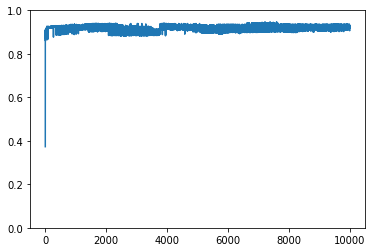

In [15]:
a = perceptron.fit(X_train,Y_train,10000)
plt.ylim(0,1)
plt.plot(list(a.keys()),list(a.values()))
plt.show()

As we can see from above plot that accuracy oscillate for some initial epochs. Then it starts to become stable.
This happens because loss tends to oscillate around local minima, without converging to lowest point.<br>
So let's set the learning rate

#####  2. Learning rate:

0.94921875


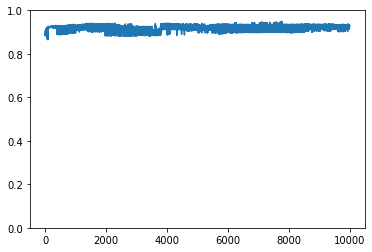

In [16]:
a = perceptron.fit(X_train,Y_train,10000,0.0001)
plt.ylim(0,1)
plt.plot(list(a.keys()),list(a.values()))
plt.show()

Now, we can see that there is much less oscillation.<br>
**Note : This is not the tuning of learning rate. This done just to understand the importance of learning rate.**
## 4. Evaluation:

In [17]:
y_pred = perceptron.predict(X_test)
accuracy = accuracy_score(y_pred,Y_test)
print(accuracy)

0.9473684210526315


We are getting almost same accuracy on test data as well.